# TLC NYC DATA ANALISIS

**Ikhsan Herdi Fajriyanto**



# Background Story

Taxi & Limousine Commission (TLC NYC) merupakan lembaga pemerintah Kota New York yang bertanggung jawab untuk mengatur seluruh yang berhubungan dengan kendaraan taksi. Tanggung jawab dari komisi NYC TLC termasuk dalam melindungi keselamatan publik, menerbitkan dan mengatur izin serta menetapkan dan membatasi tarif taksi. Di mana Komisi NYC TLC ingin data analyst untuk menganalisa pengoperasian perjalanan taksi selama di bulan Januari 2023.

Dataset ini mencakup berbagai informasi detail mengenai perjalanan taksi, seperti:<br>

✅ Waktu penjemputan & pengantaran<br>
✅ Zona pickup dan drop-off<br>
✅ Jarak perjalanan<br>
✅ Tarif perjalanan & biaya tambahan<br>
✅ Metode pembayaran<br>

# Problem

**Stakeholder** : NYC TLC

Dalam memberikan rekomendasi untuk meningkatkan profit bagi NYC TLC serta para pengemudi taksi juga mendapatkan pendapatan yang lebih baik maka seorang Data Analyst akan menjawab beberapa pertanyaan :

1. Di wilayah mana pendapatan taksi terbesar dan pendapatan taksi terbesar terjadi di hari apa ? 

2. Pukul berapa penumpang umumnya memerlukan layanan taksi untuk melakukan perjalanan?

3. Berapa banyak persentase penumpang yang menggunakan metode pembayaran tertentu?

4. Berapa banyak penumpang yang paling banyak memberikan tip berdasarkan zona dan pickup time?

3. Di wilayah mana jumlah pickup terbesar dan kapan jumlah pickup terbesar terjadi (weekdays/weekend) ?

4. Perjalanan pickup-dropoff mana yang paling sering dilakukan saat trip ?

6. Apakah penumpang lebih sering menggunakan taxi untuk perjalanan jarak pendek, menengah, atau jarak jauh? 


# Goals

Untuk meningkatkan profit bagi NYC TLC dan meningkatkan pendapatan pengemudi taksi maka dalam analisa ini terdiri atas :
1. Mengidentifikasi wilayah dan dispesifikasikan ke dalam zona di setiap wilayah serta waktu (hari) yang memiliki potensi untuk mendapatkan income yang besar.

2. Mengidentifikasi waktu (jam) yang menjadi peak dalam permintaan untuk menggunakan layanan taksi di setiap wilayah. 

3. Mengidentifikasi penumpang yang menggunakan metode pembayaran tertentu 

4. Mengidentifikasi pemberian tip terbanyak berdasarkan zona, waktu pickup, dan borough 

3. Mengidentifikasi wilayah serta waktu (weekdays / weekend) yang memiliki jumlah permintaan penumpang terhadap layanan taksi.

4. Mengidentifikasi perjalanan yang banyak sering dilakukan oleh penumpang.

5. Mengkategorikan perjalanan mana antara pendek, menengah, panjang yang paling sering dilakukan oleh penumpang

# Exploratory Data Analysis

- **VendorID** : Perusahaan yang memiliki armada taksi merekam data transaksi perjalanan taksi
    - 1 = Creative Mobile Technologies, LLC.
    - 2 = VeriFone Inc.
- **lpep_pickup_datetime** : tanggal dan waktu saat argometer taksi dinyalakan bisa juga di artikan saat penumpang masuk atau perjalanan dimulai
- **lpep_dropoff_datetime** : tanggal dan waktu saat argometer taksi dimatikan bisa juga di artikan saat penumpang turun atau perjalanan selesai
- **store_and_fwd_flag** : Menunjukkan apakah catatan perjalanan disimpan di memori kendaraan sebelum dikirimkan ke vendor.
    - Y = data disimpan
    - N = data tidak disimpan
- **RatecodeID** : Kode numerik yang menunjukkan kode tarif untuk perjalanan 
    - 1 = Standard rate
    - 2 = JFK
    - 3 = Newark
    - 4 = Nassau or Westchester
    - 5 = Negotiated fare
    - 6 = Group ride
- **PULocationID** : Pengidentifikasi lokasi penjemputan yang sesuai dengan area geografis tertentu.
- **DOLocationID** : Pengidentifikasi lokasi penurunan yang sesuai dengan area geografis tertentu.
- **passenger_count** : Jumlah penumpang dalam taksi.
- **trip_distance** : Jarak perjalanan dalam mil.
- **fare_amount** : Jumlah yang dibebankan untuk perjalanan sebelum biaya tambahan.
- **extra** : Biaya tambahan (misalnya, biaya jam sibuk atau biaya penginapan).
- **mta_tax** : Pajak Otoritas Transportasi Metropolitan (MTA) ($0.5 otomatis ditambahkan berdasarkan rate).
- **tip_amount** : Jumlah tip (otomatis ditambahkan jika menggunakan kartu kredit, cash tidak dihitung).
- **tolls_amount** : Biaya tol selama perjalanan.
- **ehail_fee** : Biaya terkait layanan e-hailing (E-Hail (pemesanan elektronik) memungkinkan seorang penumpang menggunakan aplikasi berlisensi TLC untuk memesan taksi kuning atau Street-Hail Livery (taksi hijau) menggunakan tarif resmi. E-Hail hanya berlaku untuk taksi kuning dan taksi hijau.).
- **improvement_surcharge** : Biaya peningkatan.
- **total_amount** : Jumlah total yang dibayarkan oleh penumpang kecuali tip dengan cash. 
- **payment_type** : Tipe pembayaran yang digunakan (misalnya, kartu kredit, tunai).
    - 1 = Credit card
    - 2 = Cash
    - 3 = No charge
    - 4 = Dispute
    - 5 = Unknown
    - 6 = Voided trip
- **trip_type** : Jenis perjalanan (misalnya, street-hail, dispatch).
    - 1 = Street-hail
    - 2 = Dispatch
- **congestion_surcharge** : Biaya tambahan untuk tarif kepadatan lalu lintas.


notes
- total_amount = fare_amount+extra+mta_tax+tip_amount+tolls_amount+improvement_surcharge+congestion_surcharge

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import geopandas as gpd
import seaborn as sns
import folium
from folium import plugins

In [2]:
df_TLC_NYC = pd.read_csv('NYC TLC Trip Record.csv')
df_TLC_NYC

C:\Users\Ikhsan Herdi F\AppData\Local\Temp\ipykernel_18048\830116328.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_TLC_NYC = pd.read_csv('NYC TLC Trip Record.csv')


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


In [3]:
df_TLC_NYC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [4]:
display(df_TLC_NYC.describe(), df_TLC_NYC.describe(include='object'))

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-07 23:58:06,2023-01-06 00:00:00,N
freq,4,6,63579


In [5]:
# persentase missing value di tiap kolom
df_TLC_NYC.isna().sum()/df_TLC_NYC.shape[0]*100

VendorID                   0.000000
lpep_pickup_datetime       0.000000
lpep_dropoff_datetime      0.000000
store_and_fwd_flag         6.339154
RatecodeID                 6.339154
PULocationID               0.000000
DOLocationID               0.000000
passenger_count            6.339154
trip_distance              0.000000
fare_amount                0.000000
extra                      0.000000
mta_tax                    0.000000
tip_amount                 0.000000
tolls_amount               0.000000
ehail_fee                100.000000
improvement_surcharge      0.000000
total_amount               0.000000
payment_type               6.339154
trip_type                  6.353814
congestion_surcharge       6.339154
dtype: float64

Secara umum, kita bisa melihat bahwa:
* dataset TLC NYC Trip Record memiliki 20 kolom dan 68,211 baris
* beberapa kolom, yaitu, `store_and_fwd_flag`, `RatecodeID `, `passenger_count `, `payment_type`, `trip_type`, dan `congestion_surcharge` memiliki data kosong. Data kosong pada kolom-kolom tersebut diwakili dengan data NaN/0.
* kolom `ehail_fee` memiliki missing value 100% maka dapat kita asumsikan tidak ada yang menggunakan aplikasi e-hail, sehingga tidak relevan dalam analisis dan kolom bisa di drop.
* kolom `passenger_count` terdapat data yang memiliki value lebih dari 5 (berdasarkan hukum TLC NYC maksimal kapasitas penumpang adalah 5). Maka kita akan coba melihat berapa banyak data yang memiliki value lebih dari 5 passanger_count. (https://www.nyc.gov/site/tlc/passengers/passenger-frequently-asked-questions.page)
* kolom `lpep_pickup_datetime` dan `lpep_dropoff_datetime` memiliki tipe data object, maka kita perlu ubah kolom tersebut menjadi tipe data datetime.

# Data Cleansing #

*Konversi tipe data lpep_pickup_datetime dan lpep_dropoff_datetime menjadi datetime*

In [6]:
df_TLC_NYC["lpep_pickup_datetime"] = pd.to_datetime(df_TLC_NYC["lpep_pickup_datetime"])
df_TLC_NYC["lpep_dropoff_datetime"] = pd.to_datetime(df_TLC_NYC["lpep_dropoff_datetime"])

*Hapus kolom yang tidak berguna/missing value (kolom ehail_fee missing value 100%) dengan asumsi tidak ada yang memakai aplikasi e-hail*

In [7]:
df_TLC_NYC.drop(columns=["ehail_fee"], inplace=True)

*Drop Missing Value pada kolom passanger count*

- Mengechek proporsi missing value

In [8]:
missing_value = df_TLC_NYC[df_TLC_NYC['passenger_count'].isnull()]
null_proportion = (missing_value.shape[0] / df_TLC_NYC.shape[0])*100
null_proportion

6.33915350896483

Hasil dari perhitungan adalah yang memiliki missing value atau '0' pada kolom passanger_count kurang dari 10% atau hanya sekitar 6,33%
Maka keputusan yang diambil yaitu drop missing value tersebut pada kolom passanger_count dengan asumsi kesalahan input

In [9]:
df_TLC_NYC.dropna(subset=['passenger_count'], inplace=True)
# persentase missing value di tiap kolom
df_TLC_NYC.isna().sum()/df_TLC_NYC.shape[0]*100

VendorID                 0.000000
lpep_pickup_datetime     0.000000
lpep_dropoff_datetime    0.000000
store_and_fwd_flag       0.000000
RatecodeID               0.000000
PULocationID             0.000000
DOLocationID             0.000000
passenger_count          0.000000
trip_distance            0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
payment_type             0.000000
trip_type                0.015653
congestion_surcharge     0.000000
dtype: float64

In [10]:
df_TLC_NYC.dropna(subset=['trip_type'], inplace=True)
df_TLC_NYC.isna().sum()/df_TLC_NYC.shape[0]*100

VendorID                 0.0
lpep_pickup_datetime     0.0
lpep_dropoff_datetime    0.0
store_and_fwd_flag       0.0
RatecodeID               0.0
PULocationID             0.0
DOLocationID             0.0
passenger_count          0.0
trip_distance            0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
payment_type             0.0
trip_type                0.0
congestion_surcharge     0.0
dtype: float64

In [11]:
df_TLC_NYC

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,1.0,2.0,0.00
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75


Melakukan pengecekan duplikasi data

In [12]:
df_TLC_NYC.duplicated().sum()

np.int64(0)

Melakukan pengecekan kolom passanger_count yang memiliki value lebih dari 5

In [13]:
passangercountmorethanfive = df_TLC_NYC[df_TLC_NYC['passenger_count']>5]
passangercountmorethanfive = (passangercountmorethanfive.shape[0] / df_TLC_NYC.shape[0])*100
passangercountmorethanfive

1.6625702522034536

Hasil dari perhitungan bahwa passanger yang lebih dari 5 yaitu 1.66 persen maka keputusan yang diambil adalah drop value tersebut dengan asumsi terdapat kesalah input

In [14]:
# menghapus data yang memiliki passenger_count lebih dari 5
df_TLC_NYC = df_TLC_NYC[df_TLC_NYC['passenger_count']<=5]
df_TLC_NYC

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,1.0,2.0,0.00
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75


Menambahkan kolom baru trip_duration dalam hitungan menit

In [15]:
df_TLC_NYC["trip_duration"] = (df_TLC_NYC["lpep_dropoff_datetime"] - df_TLC_NYC["lpep_pickup_datetime"]).dt.total_seconds() / 60

C:\Users\Ikhsan Herdi F\AppData\Local\Temp\ipykernel_18048\1373731442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TLC_NYC["trip_duration"] = (df_TLC_NYC["lpep_dropoff_datetime"] - df_TLC_NYC["lpep_pickup_datetime"]).dt.total_seconds() / 60


Menambahkan kolom untuk klasifikasi trip_distance, yaitu <br>
`kurang dari 2 mile`  = Pendek<br>
`lebih dari 2 dan kurang dari 5 mile` = Menengah<br>
`lebih dari 5 mile` = panjang

In [16]:
bins = [0, 2, 5, float("inf")]
labels = ["Pendek", "Menengah", "Panjang"]
df_TLC_NYC["trip_category"] = pd.cut(df_TLC_NYC["trip_distance"], bins=bins, labels=labels, right=False)

C:\Users\Ikhsan Herdi F\AppData\Local\Temp\ipykernel_18048\1196917796.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TLC_NYC["trip_category"] = pd.cut(df_TLC_NYC["trip_distance"], bins=bins, labels=labels, right=False)


Menambahkan kolom Klasifikasikan waktu perjalanan berdasarkan jam sibuk (Rush Hour: 7-9 AM & 4-7 PM)

In [17]:
df_TLC_NYC["pickup_hour"] = df_TLC_NYC["lpep_pickup_datetime"].dt.hour
df_TLC_NYC["rush_hour"] = df_TLC_NYC["pickup_hour"].apply(lambda x: "Ya" if (7 <= x <= 9 or 16 <= x <= 19) else "Tidak")
df_TLC_NYC["pickup_day"] = df_TLC_NYC["lpep_pickup_datetime"].dt.day_name()

C:\Users\Ikhsan Herdi F\AppData\Local\Temp\ipykernel_18048\2393270388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TLC_NYC["pickup_hour"] = df_TLC_NYC["lpep_pickup_datetime"].dt.hour
C:\Users\Ikhsan Herdi F\AppData\Local\Temp\ipykernel_18048\2393270388.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TLC_NYC["rush_hour"] = df_TLC_NYC["pickup_hour"].apply(lambda x: "Ya" if (7 <= x <= 9 or 16 <= x <= 19) else "Tidak")
C:\Users\Ikhsan Herdi F\AppData\Local\Temp\ipykernel_18048\2393270388.py:3: 

Menambahkan kolom day_type berdasarkan hari dalam seminggu (0=senin, ....., 6=minggu)

In [18]:
# Tambahkan kolom day_type berdasarkan hari dalam seminggu (0=Senin, ..., 6=Minggu)
df_TLC_NYC['day_type'] = df_TLC_NYC['lpep_pickup_datetime'].dt.weekday.map(lambda x: 'Weekday' if x < 5 else 'Weekend')

C:\Users\Ikhsan Herdi F\AppData\Local\Temp\ipykernel_18048\1672203655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TLC_NYC['day_type'] = df_TLC_NYC['lpep_pickup_datetime'].dt.weekday.map(lambda x: 'Weekday' if x < 5 else 'Weekend')


In [19]:
df_TLC_NYC

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration,trip_category,pickup_hour,rush_hour,pickup_day,day_type
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,24.18,1.0,1.0,2.75,11.016667,Menengah,0,Tidak,Sunday,Weekend
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,15.84,1.0,1.0,0.00,6.766667,Pendek,0,Tidak,Sunday,Weekend
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,11.64,1.0,1.0,0.00,6.333333,Pendek,0,Tidak,Sunday,Weekend
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,10.20,1.0,1.0,0.00,5.816667,Pendek,0,Tidak,Sunday,Weekend
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,8.00,1.0,1.0,0.00,5.966667,Pendek,0,Tidak,Sunday,Weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,...,17.30,1.0,2.0,0.00,7.983333,Menengah,23,Tidak,Tuesday,Weekday
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,...,19.20,1.0,1.0,0.00,10.750000,Menengah,23,Tidak,Tuesday,Weekday
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,...,14.16,1.0,1.0,0.00,6.016667,Pendek,23,Tidak,Tuesday,Weekday
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,...,22.50,1.0,1.0,2.75,9.533333,Menengah,23,Tidak,Tuesday,Weekday


# External Dataset
Setelah dilakukan EDA terdapat sedikit kekurangan pada data NYC TLC Trip Record Dataset yaitu kita hanya memiliki PULocationID dan DOLocationID sebagai pengidentifikasi dari PickUp Location dan Drop Off Location. Maka dari itu ditambahkan External Dataset yaitu **taxi_zone** agar memiliki data lokasi PickUp dan DropOff.

* **OBJECTID** : Pengidentifikasi untuk setiap catatan atau observasi dalam dataset. Kemungkinan merupakan pengidentifikasi unik untuk setiap baris.
* **Shape_Leng** : Nilai numerik yang mewakili panjang dari bentuk geometris, kemungkinan terkait dengan geometri atau fitur spasial.
* **the_geom** : Sebuah kolom yang berisi informasi geometris atau spasial. Ini mungkin menyimpan geometri sebenarnya (koordinat) dari objek spasial.
* **Shape_Area** : Nilai numerik yang mewakili luas dari bentuk, kemungkinan terkait dengan geometri atau fitur spasial.
* **zone** : Variabel kategorikal yang mewakili zona atau wilayah. Ini bisa menjadi label atau pengidentifikasi untuk area geografis tertentu.
* **LocationID** : Pengidentifikasi untuk lokasi. Serupa dengan OBJECTID, ini dapat digunakan untuk mengidentifikasi dengan unik setiap lokasi atau zona.
* **borough** : Variabel kategorikal yang mewakili borough (daerah) yang terkait dengan zona atau lokasi. 

# JOIN DATASET EKSTERNAL <br>
**TAXI_ZONES**
<br><br>
dataset external memiliki korelasi dari dataset NYC TLC Trip Record yang berisi zona dari pickup dan dropoff location

In [20]:
df_zones = gpd.read_file(r'D:\Purwadhika School - JCDS2804\Module 2 - Data Analyst\0000. CAPSTONE MODUL 2\External_Dataset\taxi_zones.shp')
df_zones

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."
...,...,...,...,...,...,...,...
258,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx,"POLYGON ((1025414.782 270986.139, 1025138.624 ..."
259,260,0.133514,0.000422,Woodside,260,Queens,"POLYGON ((1011466.966 216463.005, 1011545.889 ..."
260,261,0.027120,0.000034,World Trade Center,261,Manhattan,"POLYGON ((980555.204 196138.486, 980570.792 19..."
261,262,0.049064,0.000122,Yorkville East,262,Manhattan,"MULTIPOLYGON (((999804.795 224498.527, 999824...."


Melakukan join pada dataset tersebut ke dataset NYC TLC Trip Record

In [21]:
# Pastikan tidak mengubah df_zones asli
df_zones_PU = df_zones.rename(columns={"LocationID": "PULocationID", "zone": "PU_zone", "borough": "PU_borough"}).copy()


In [22]:
# Join untuk Pickup Location
df_TLC_NYC = df_TLC_NYC.merge(df_zones_PU[["PULocationID", "PU_zone", "PU_borough"]].drop_duplicates(), on="PULocationID", how="left")


In [23]:
# Buat salinan baru untuk Dropoff Location
df_zones_DO = df_zones_PU.rename(columns={"PULocationID": "DOLocationID", "PU_zone": "DO_zone", "PU_borough": "DO_borough"}).copy()

In [24]:
# Join untuk Dropoff Location
df_TLC_NYC = df_TLC_NYC.merge(df_zones_DO[["DOLocationID", "DO_zone", "DO_borough"]].drop_duplicates(), on="DOLocationID", how="left")

In [25]:
df_TLC_NYC


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,trip_duration,trip_category,pickup_hour,rush_hour,pickup_day,day_type,PU_zone,PU_borough,DO_zone,DO_borough
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,11.016667,Menengah,0,Tidak,Sunday,Weekend,Morningside Heights,Manhattan,Lincoln Square West,Manhattan
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,6.766667,Pendek,0,Tidak,Sunday,Weekend,Bloomingdale,Manhattan,Central Park,Manhattan
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,6.333333,Pendek,0,Tidak,Sunday,Weekend,Steinway,Queens,Old Astoria,Queens
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,5.816667,Pendek,0,Tidak,Sunday,Weekend,Central Harlem,Manhattan,Upper West Side North,Manhattan
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,5.966667,Pendek,0,Tidak,Sunday,Weekend,Central Harlem,Manhattan,East Harlem North,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62810,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,...,7.983333,Menengah,23,Tidak,Tuesday,Weekday,Jamaica,Queens,Saint Albans,Queens
62811,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,...,10.750000,Menengah,23,Tidak,Tuesday,Weekday,Downtown Brooklyn/MetroTech,Brooklyn,Park Slope,Brooklyn
62812,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,...,6.016667,Pendek,23,Tidak,Tuesday,Weekday,Washington Heights South,Manhattan,Hamilton Heights,Manhattan
62813,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,...,9.533333,Menengah,23,Tidak,Tuesday,Weekday,East Harlem North,Manhattan,Upper West Side North,Manhattan


melakukan pengecekan pada data yang sudah di merge

In [26]:
df_TLC_NYC.isna().sum()

VendorID                   0
lpep_pickup_datetime       0
lpep_dropoff_datetime      0
store_and_fwd_flag         0
RatecodeID                 0
PULocationID               0
DOLocationID               0
passenger_count            0
trip_distance              0
fare_amount                0
extra                      0
mta_tax                    0
tip_amount                 0
tolls_amount               0
improvement_surcharge      0
total_amount               0
payment_type               0
trip_type                  0
congestion_surcharge       0
trip_duration              0
trip_category              0
pickup_hour                0
rush_hour                  0
pickup_day                 0
day_type                   0
PU_zone                  200
PU_borough               200
DO_zone                  655
DO_borough               655
dtype: int64

TERDAPAT :  
<br>200 data dengan kolom PU_zone dan PU_borough dan 655 DO_zone, DO_borough karena kolom 'PULocationID' dan 'DOLocationID' memiliki nilai yang tidak ada pada dataframe taxi_zone sehingga nilai kolom-kolom tersebut bernilai null.
- Dilakukan asumsi bahwa data tersebut adalah pickup atau dropoff di luar kota New York.
- sehingga saya akan melakukan drop pada data tersebut.

In [27]:
df_TLC_NYC.dropna(subset=['PU_zone', 'DO_zone'],inplace=True)
display(df_TLC_NYC.isna().sum())
display(df_TLC_NYC.duplicated().sum())

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
trip_duration            0
trip_category            0
pickup_hour              0
rush_hour                0
pickup_day               0
day_type                 0
PU_zone                  0
PU_borough               0
DO_zone                  0
DO_borough               0
dtype: int64

np.int64(0)

In [28]:
df_TLC_NYC.duplicated().sum()

np.int64(0)

Melakukan pengecekan data diluar bulan januari 2023 menggunakan lpep_pickup_datetime

In [29]:
df_TLC_NYC[(df_TLC_NYC['lpep_pickup_datetime'] < pd.to_datetime('2022-12-31 23:59:59')) 
         | (df_TLC_NYC['lpep_pickup_datetime'] > pd.to_datetime('2023-1-31 23:59:59'))]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,trip_duration,trip_category,pickup_hour,rush_hour,pickup_day,day_type,PU_zone,PU_borough,DO_zone,DO_borough
294,2,2022-12-09 14:10:49,2022-12-09 14:22:26,N,1.0,7,56,1.0,5.37,16.0,...,11.616667,Panjang,14,Tidak,Friday,Weekday,Astoria,Queens,Corona,Queens
314,2,2022-12-09 14:55:42,2022-12-09 15:33:06,N,1.0,260,164,1.0,5.48,25.5,...,37.400000,Panjang,14,Tidak,Friday,Weekday,Woodside,Queens,Midtown South,Manhattan
17552,2,2009-01-01 20:21:27,2009-01-02 11:07:31,N,1.0,65,178,1.0,7.72,34.5,...,886.066667,Panjang,20,Tidak,Thursday,Weekday,Downtown Brooklyn/MetroTech,Brooklyn,Ocean Parkway South,Brooklyn
24666,2,2023-02-01 03:10:05,2023-02-01 03:40:35,N,5.0,82,198,2.0,4.58,28.0,...,30.500000,Menengah,3,Tidak,Wednesday,Weekday,Elmhurst,Queens,Ridgewood,Queens


filter datatime pickup time hanya bulan januari 2023 karena data mayoritas ada di bulan januari 2023, hanya ada 4 data yang diluar januari 2023

In [30]:
df_TLC_NYC = df_TLC_NYC[(df_TLC_NYC['lpep_pickup_datetime'] > pd.to_datetime('2022-12-31 23:59:59')) 
         & (df_TLC_NYC['lpep_pickup_datetime'] < pd.to_datetime('2023-1-31 23:59:59'))]

In [31]:
df_TLC_NYC

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,trip_duration,trip_category,pickup_hour,rush_hour,pickup_day,day_type,PU_zone,PU_borough,DO_zone,DO_borough
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,11.016667,Menengah,0,Tidak,Sunday,Weekend,Morningside Heights,Manhattan,Lincoln Square West,Manhattan
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,6.766667,Pendek,0,Tidak,Sunday,Weekend,Bloomingdale,Manhattan,Central Park,Manhattan
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,6.333333,Pendek,0,Tidak,Sunday,Weekend,Steinway,Queens,Old Astoria,Queens
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,5.816667,Pendek,0,Tidak,Sunday,Weekend,Central Harlem,Manhattan,Upper West Side North,Manhattan
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,5.966667,Pendek,0,Tidak,Sunday,Weekend,Central Harlem,Manhattan,East Harlem North,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62810,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,...,7.983333,Menengah,23,Tidak,Tuesday,Weekday,Jamaica,Queens,Saint Albans,Queens
62811,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,...,10.750000,Menengah,23,Tidak,Tuesday,Weekday,Downtown Brooklyn/MetroTech,Brooklyn,Park Slope,Brooklyn
62812,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,...,6.016667,Pendek,23,Tidak,Tuesday,Weekday,Washington Heights South,Manhattan,Hamilton Heights,Manhattan
62813,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,...,9.533333,Menengah,23,Tidak,Tuesday,Weekday,East Harlem North,Manhattan,Upper West Side North,Manhattan


# Setelah dilakukan Wranggling dataset tersebut, kemudian dilakukan analisis dari dataset tersebut<br>

**Deteksi Outlier antara fare_amount dan trip_distance**

**Visualisasi Outlier dengan Boxplot**

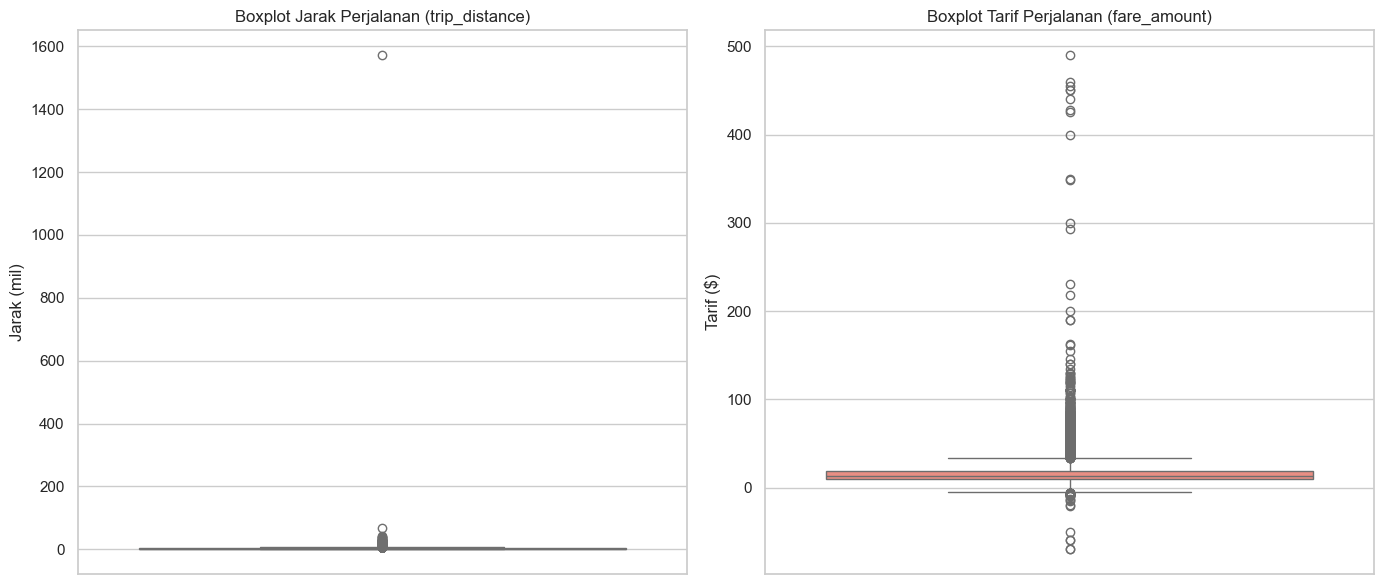

In [32]:
# Set style
sns.set(style="whitegrid")

# Membuat boxplot untuk trip_distance dan fare_amount
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot Trip Distance
sns.boxplot(y=df_TLC_NYC['trip_distance'], ax=axes[0], color="skyblue")
axes[0].set_title("Boxplot Jarak Perjalanan (trip_distance)")
axes[0].set_ylabel("Jarak (mil)")

# Boxplot Fare Amount
sns.boxplot(y=df_TLC_NYC['fare_amount'], ax=axes[1], color="salmon")
axes[1].set_title("Boxplot Tarif Perjalanan (fare_amount)")
axes[1].set_ylabel("Tarif ($)")

plt.tight_layout()
plt.show()

**Boxplot menunjukkan adanya outlier ekstrem pada jarak perjalanan dan tarif perjalanan.**
<br>
Trip Distance: Beberapa perjalanan memiliki jarak yang sangat jauh dibandingkan dengan mayoritas data.

Fare Amount: Beberapa tarif sangat tinggi, kemungkinan karena perjalanan panjang atau kesalahan pencatatan.

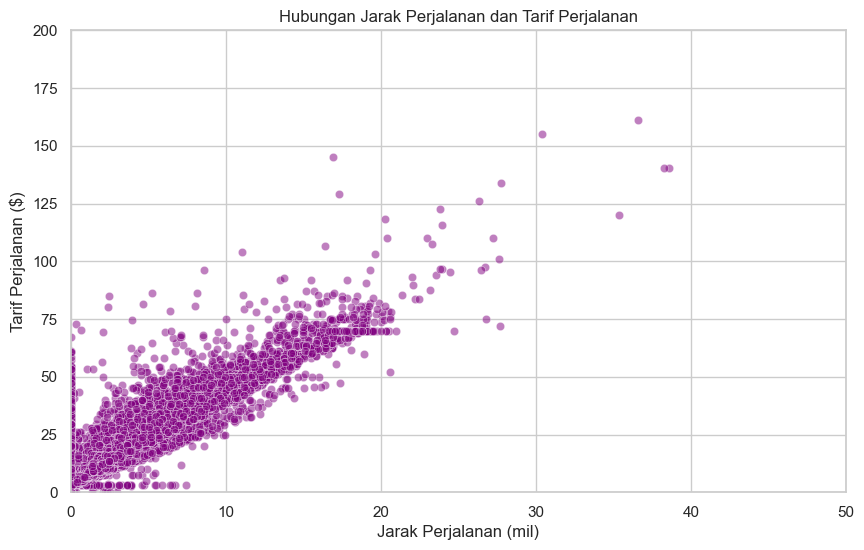

In [61]:
# Scatter plot hubungan antara trip_distance dan fare_amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_TLC_NYC['trip_distance'], y=df_TLC_NYC['fare_amount'], alpha=0.5, color='purple')

plt.xlim(0, 50)  # Batasi untuk fokus pada data utama
plt.ylim(0, 200)  # Batasi rentang tarif
plt.xlabel("Jarak Perjalanan (mil)")
plt.ylabel("Tarif Perjalanan ($)")
plt.title("Hubungan Jarak Perjalanan dan Tarif Perjalanan")
plt.show()

Scatter plot menunjukkan adanya korelasi positif antara jarak perjalanan dan tarif perjalanan—semakin jauh perjalanan, semakin tinggi tarifnya. Namun, terdapat beberapa outlier tarif yang jauh lebih tinggi dari tren umum.

https://www.nyc.gov/site/tlc/about/driver-pay-rates.page <br>
berdasarkan dari informasi resmi website diatas menunjukan bahwa biaya yang dikenakan untuk per mile TLC drivers di New York City sebesar `$2.50`, dan untuk permenit rate yaitu `$0.50`, lalu initial charge (tarif awal) sebesar `$3.00`

In [34]:
# Tambahkan kolom estimasi tarif berdasarkan aturan resmi TLC NYC
df_TLC_NYC['estimated_fare'] = 3.00 + (df_TLC_NYC['trip_distance'] * 2.50) + (df_TLC_NYC['trip_duration'] * 0.50)


# Hitung selisih antara actual fare dan estimasi
df_TLC_NYC['fare_diff'] = df_TLC_NYC['fare_amount'] - df_TLC_NYC['estimated_fare']

# Tandai sebagai outlier jika deviasi terlalu besar (kita asumsikan lebih dari $20 sebagai ambang batas toleransi realistis)
df_outlier_tarif = df_TLC_NYC[abs(df_TLC_NYC['fare_diff']) > 20]

df_outlier_tarif

C:\Users\Ikhsan Herdi F\AppData\Local\Temp\ipykernel_18048\653001943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TLC_NYC['estimated_fare'] = 3.00 + (df_TLC_NYC['trip_distance'] * 2.50) + (df_TLC_NYC['trip_duration'] * 0.50)
C:\Users\Ikhsan Herdi F\AppData\Local\Temp\ipykernel_18048\653001943.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TLC_NYC['fare_diff'] = df_TLC_NYC['fare_amount'] - df_TLC_NYC['estimated_fare']


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,pickup_hour,rush_hour,pickup_day,day_type,PU_zone,PU_borough,DO_zone,DO_borough,estimated_fare,fare_diff
32,2,2023-01-01 00:40:58,2023-01-01 01:04:32,N,5.0,66,164,4.0,6.78,60.0,...,0,Tidak,Sunday,Weekend,DUMBO/Vinegar Hill,Brooklyn,Midtown South,Manhattan,31.733333,28.266667
42,2,2023-01-01 00:16:10,2023-01-01 00:54:55,N,5.0,66,48,3.0,6.19,75.0,...,0,Tidak,Sunday,Weekend,DUMBO/Vinegar Hill,Brooklyn,Clinton East,Manhattan,37.850000,37.150000
48,2,2023-01-01 00:23:04,2023-01-01 23:18:32,N,1.0,255,48,1.0,8.55,47.8,...,0,Tidak,Sunday,Weekend,Williamsburg (North Side),Brooklyn,Clinton East,Manhattan,712.108333,-664.308333
97,2,2023-01-01 00:57:51,2023-01-01 01:07:05,N,5.0,260,74,2.0,5.34,52.0,...,0,Tidak,Sunday,Weekend,Woodside,Queens,East Harlem North,Manhattan,20.966667,31.033333
103,2,2023-01-01 01:11:01,2023-01-01 01:11:06,N,5.0,179,179,2.0,0.01,190.0,...,1,Tidak,Sunday,Weekend,Old Astoria,Queens,Old Astoria,Queens,3.066667,186.933333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62136,2,2023-01-31 17:18:06,2023-01-31 17:18:10,N,5.0,243,243,1.0,0.00,50.0,...,17,Ya,Tuesday,Weekday,Washington Heights North,Manhattan,Washington Heights North,Manhattan,3.033333,46.966667
62216,2,2023-01-31 18:22:24,2023-02-01 00:00:00,N,1.0,82,82,1.0,1.46,10.7,...,18,Ya,Tuesday,Weekday,Elmhurst,Queens,Elmhurst,Queens,175.450000,-164.750000
62396,2,2023-01-31 19:40:22,2023-02-01 00:00:00,N,1.0,226,173,1.0,2.94,14.9,...,19,Ya,Tuesday,Weekday,Sunnyside,Queens,North Corona,Queens,140.166667,-125.266667
62738,2,2023-01-31 22:03:44,2023-01-31 22:03:56,N,5.0,74,74,2.0,7.84,50.0,...,22,Tidak,Tuesday,Weekday,East Harlem North,Manhattan,East Harlem North,Manhattan,22.700000,27.300000


Setelah di cek terdapat `818` atau sekitar `1,32%` kolom data yang memiliki fare_diff lebih dari 20$ dari estimated_fare bahkan terdapat value yang bernilai minus dan banyak juga trip yang durasi nya singkat namun biaya yang dikenakan sangat tinggi.

Maka akan dihilangkan outlier karena data visualisasi distribusi relatif skewed (miring) dan juga outlier kurang dari 5% dengan asumsi bahwa terdapat kesalahan input antara trip_distance dan fare_amount

In [35]:
# menghapus outlier yang memiliki deviasi terlalu besar (kita asumsikan lebih dari $20 sebagai ambang batas toleransi realistis)
df_TLC_NYC = df_TLC_NYC[abs(df_TLC_NYC['fare_diff']) <= 20]
df_TLC_NYC = df_TLC_NYC.drop(columns=['estimated_fare', 'fare_diff'])

C:\Users\Ikhsan Herdi F\AppData\Local\Temp\ipykernel_18048\3520188904.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_routes["trip_count"], y=top_routes.apply(lambda x: f"{x['PU_zone']} → {x['DO_zone']}", axis=1), palette="Greens_r")


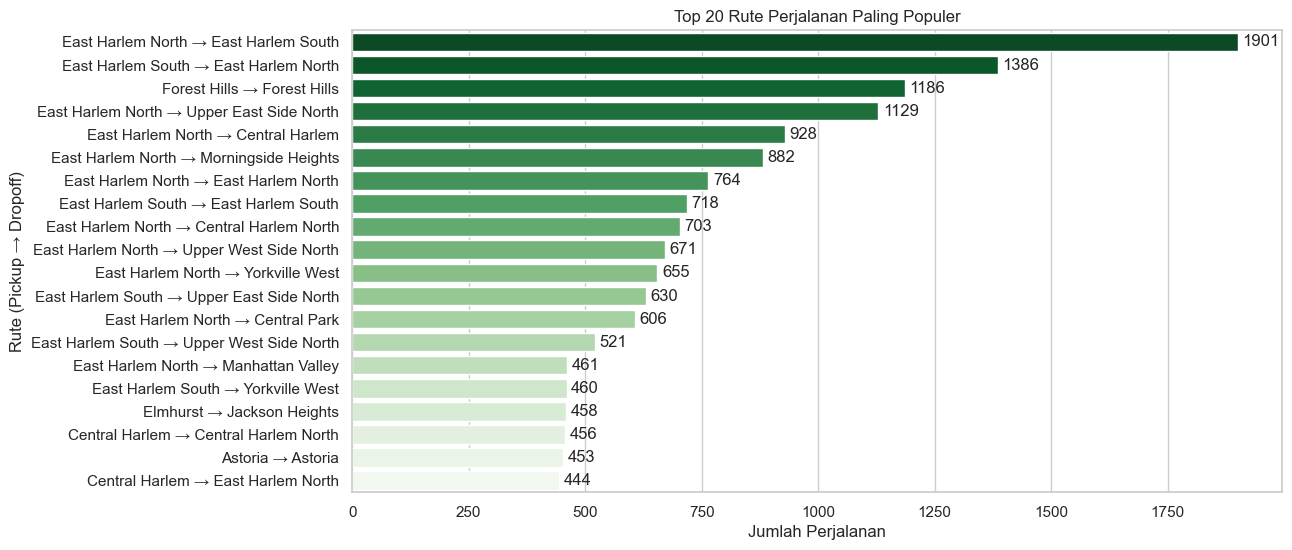

In [36]:
# Identifikasi rute paling populer (zona pickup & dropoff terbanyak)
top_routes = df_TLC_NYC.groupby(["PU_zone", "DO_zone"]).size().reset_index(name="trip_count")
top_routes = top_routes.sort_values(by="trip_count", ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_routes["trip_count"], y=top_routes.apply(lambda x: f"{x['PU_zone']} → {x['DO_zone']}", axis=1), palette="Greens_r")
for i, v in enumerate(top_routes["trip_count"]):
    plt.text(v + 10, i, str(v), va="center")
plt.title("Top 20 Rute Perjalanan Paling Populer")
plt.xlabel("Jumlah Perjalanan")
plt.ylabel("Rute (Pickup → Dropoff)")
plt.show()

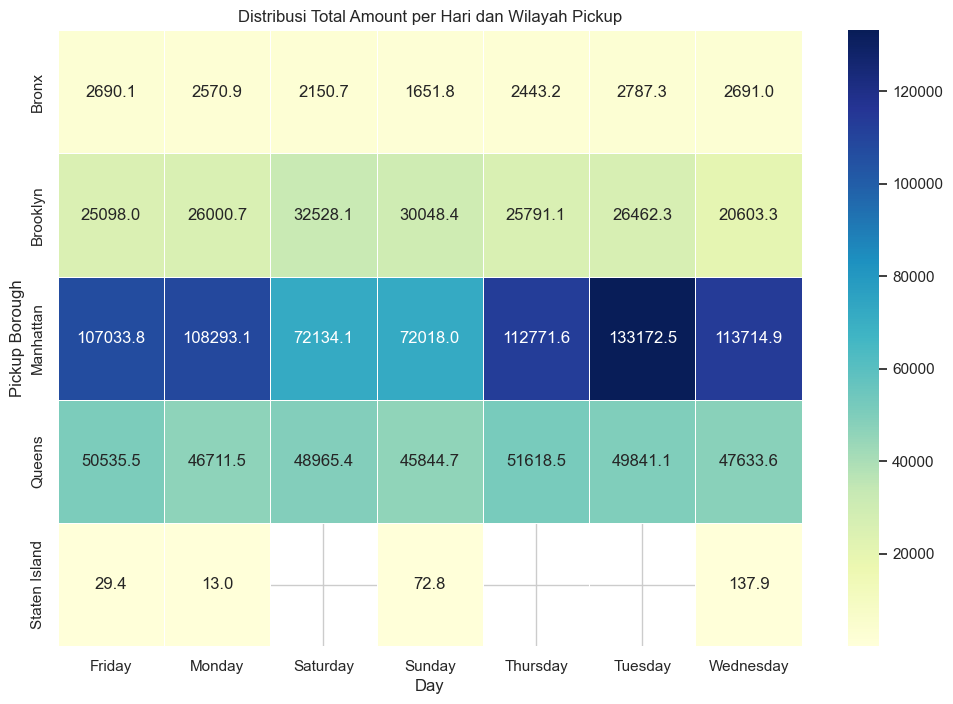

In [37]:
# Menghitung total_amount untuk setiap PU_zone
total_amount_per_zone = df_TLC_NYC.groupby(['PU_borough', 'pickup_day'])['total_amount'].sum()

# Mengubah data menjadi DataFrame
heatmap_data = total_amount_per_zone.reset_index()

# Membuat pivot table
heatmap_pivot = heatmap_data.pivot_table(index='PU_borough', columns='pickup_day', values='total_amount')

# Membuat heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_pivot, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)
plt.title('Distribusi Total Amount per Hari dan Wilayah Pickup')
plt.xlabel('Day')
plt.ylabel('Pickup Borough')
plt.show()

C:\Users\Ikhsan Herdi F\AppData\Local\Temp\ipykernel_18048\3296563773.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_fare_borough.index, y=avg_fare_borough.values, palette="coolwarm")


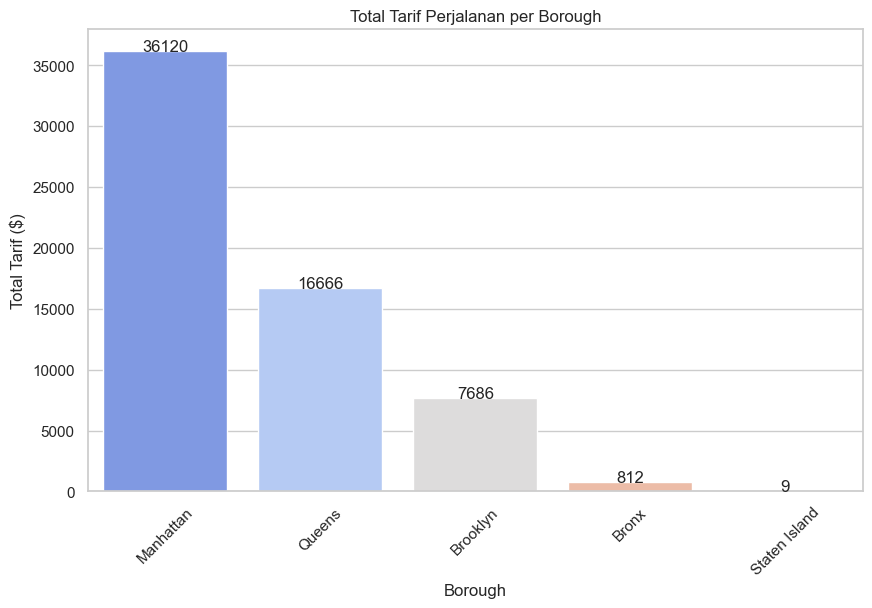

In [38]:
# Menghitung rata-rata tarif per borough
avg_fare_borough = df_TLC_NYC.groupby("PU_borough")["fare_amount"].count().sort_values(ascending=False)

# Visualisasi rata-rata tarif perjalanan per borough
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_fare_borough.index, y=avg_fare_borough.values, palette="coolwarm")
for i in range(len(avg_fare_borough)):
    plt.text(i, avg_fare_borough.values[i], round(avg_fare_borough.values[i], 2), ha="center")
plt.title("Total Tarif Perjalanan per Borough")
plt.xlabel("Borough")
plt.ylabel("Total Tarif ($)")
plt.xticks(rotation=45)
plt.show()

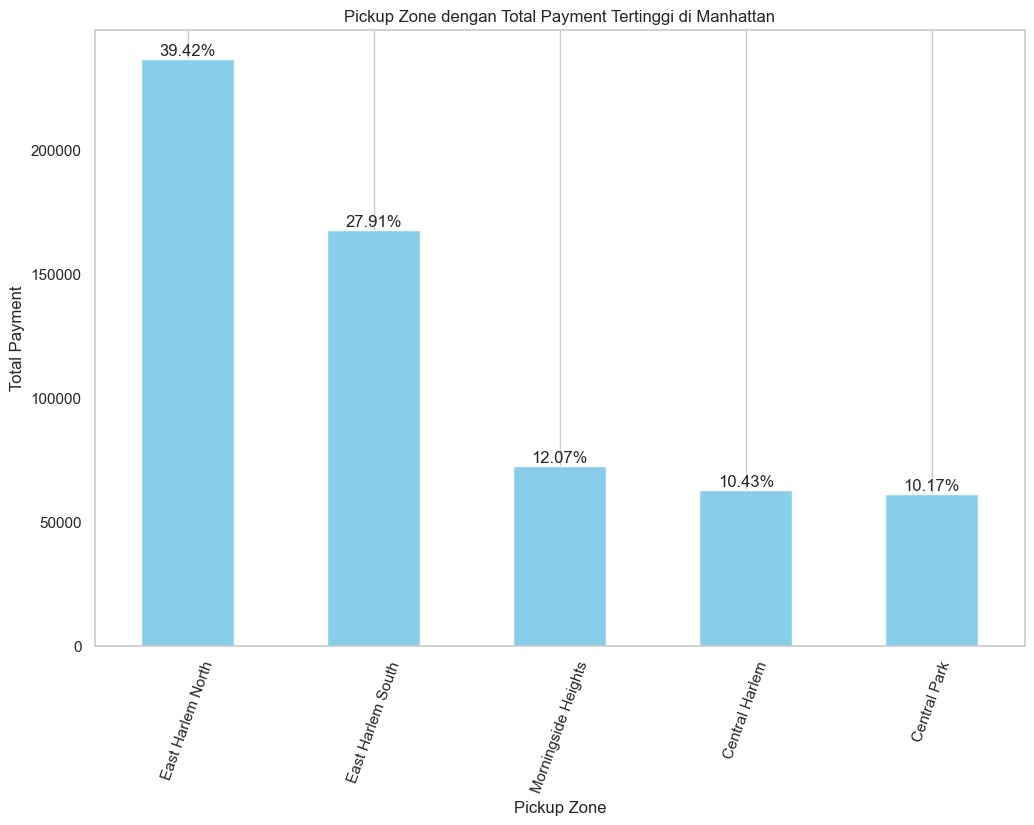

In [39]:
# Filter data berdasarkan Pickup_Borough = 'Manhattan'
manhattan = df_TLC_NYC[df_TLC_NYC['PU_borough'] == 'Manhattan']

# Mengelompokkan data berdasarkan PUZone dan menghitung total_amount kemudian memilih 10 PUZone dengan total_amount tertinggi
top_payment_manhattan = manhattan.groupby('PU_zone')['total_amount'].sum().nlargest(5)

# Plotting bar plot untuk top 10 PUZone di Manhattan
plt.figure(figsize=(12, 8))
bars = top_payment_manhattan.plot(kind='bar', color='skyblue')
plt.title('Pickup Zone dengan Total Payment Tertinggi di Manhattan')
plt.xlabel('Pickup Zone')
plt.ylabel('Total Payment')
plt.xticks(rotation=70)
plt.grid(axis='y')

# Menambahkan nilai persentase pada setiap bar
total = top_payment_manhattan.sum()
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 500, f'{height/total:.2%}', ha='center', va='bottom')

plt.show()

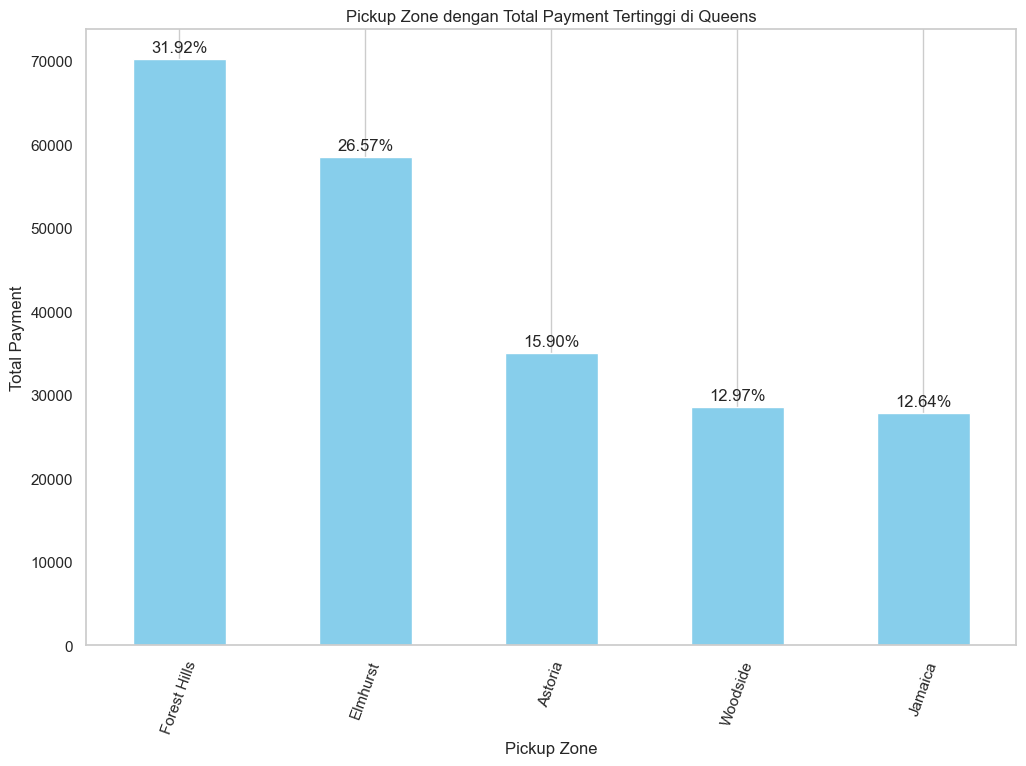

In [40]:
# Filter data berdasarkan Pickup_Borough = 'Queens'
queens = df_TLC_NYC[df_TLC_NYC['PU_borough'] == 'Queens']

# Mengelompokkan data berdasarkan PUZone dan menghitung total_amount kemudian memilih 5 PUZone dengan total_amount tertinggi
top_payment_queens = queens.groupby('PU_zone')['total_amount'].sum().nlargest(5)

# Plotting bar plot untuk top 5 PUZone di Queens
plt.figure(figsize=(12, 8))
bars = top_payment_queens.plot(kind='bar', color='skyblue')
plt.title('Pickup Zone dengan Total Payment Tertinggi di Queens')
plt.xlabel('Pickup Zone')
plt.ylabel('Total Payment')
plt.xticks(rotation=70)
plt.grid(axis='y')

# Menambahkan nilai persentase pada setiap bar
total = top_payment_queens.sum()
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 500, f'{height/total:.2%}', ha='center', va='bottom')

plt.show()

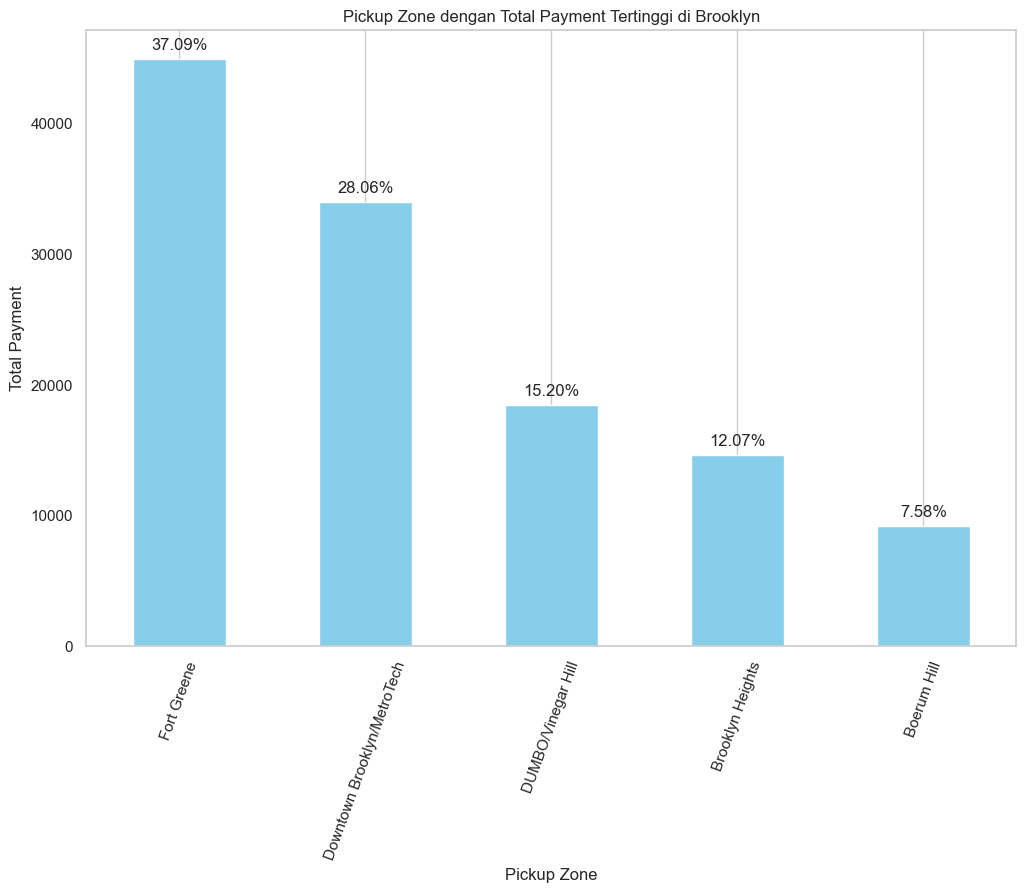

In [41]:
# Filter data berdasarkan Pickup_Borough = 'Brooklyn'
brooklyn = df_TLC_NYC[df_TLC_NYC['PU_borough'] == 'Brooklyn']

# Mengelompokkan data berdasarkan PUZone dan menghitung total_amount kemudian memilih 5 PUZone dengan total_amount tertinggi
top_payment_brooklyn = brooklyn.groupby('PU_zone')['total_amount'].sum().nlargest(5)

# Plotting bar plot untuk top 5 PU_zone di Brooklyn
plt.figure(figsize=(12, 8))
bars = top_payment_brooklyn.plot(kind='bar', color='skyblue')
plt.title('Pickup Zone dengan Total Payment Tertinggi di Brooklyn')
plt.xlabel('Pickup Zone')
plt.ylabel('Total Payment')
plt.xticks(rotation=70)
plt.grid(axis='y')

# Menambahkan nilai persentase pada setiap bar
total = top_payment_brooklyn.sum()
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 500, f'{height/total:.2%}', ha='center', va='bottom')

plt.show()

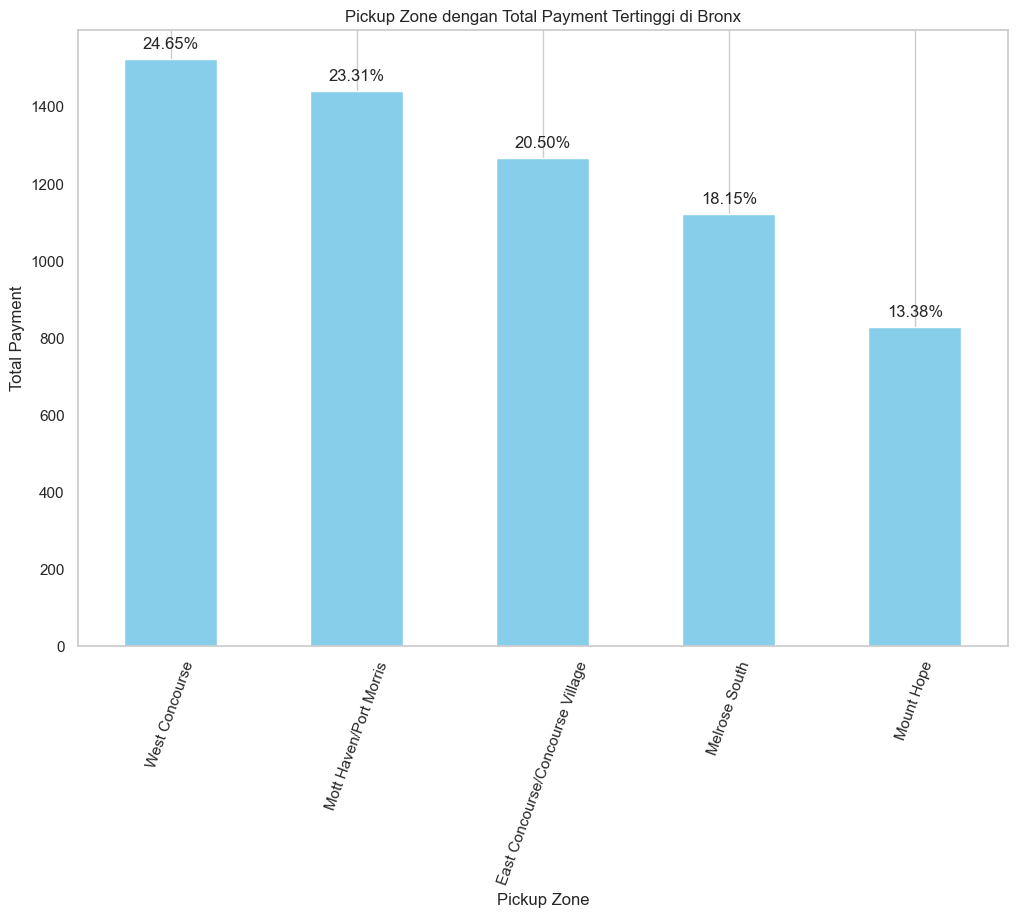

In [42]:
# Filter data berdasarkan PU_borough = 'Bronx'
bronx = df_TLC_NYC[df_TLC_NYC['PU_borough'] == 'Bronx']

# Mengelompokkan data berdasarkan PU_zone dan menghitung total_amount kemudian memilih 5 PU_zone dengan total_amount tertinggi
top_payment_bronx = bronx.groupby('PU_zone')['total_amount'].sum().nlargest(5)

# Plotting bar plot untuk top 5 PU_zone di Bronx
plt.figure(figsize=(12, 8))
bars = top_payment_bronx.plot(kind='bar', color='skyblue')
plt.title('Pickup Zone dengan Total Payment Tertinggi di Bronx')
plt.xlabel('Pickup Zone')
plt.ylabel('Total Payment')
plt.xticks(rotation=70)
plt.grid(axis='y')

# Menambahkan nilai persentase pada setiap bar
total = top_payment_bronx.sum()
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 20, f'{height/total:.2%}', ha='center', va='bottom')

plt.show()

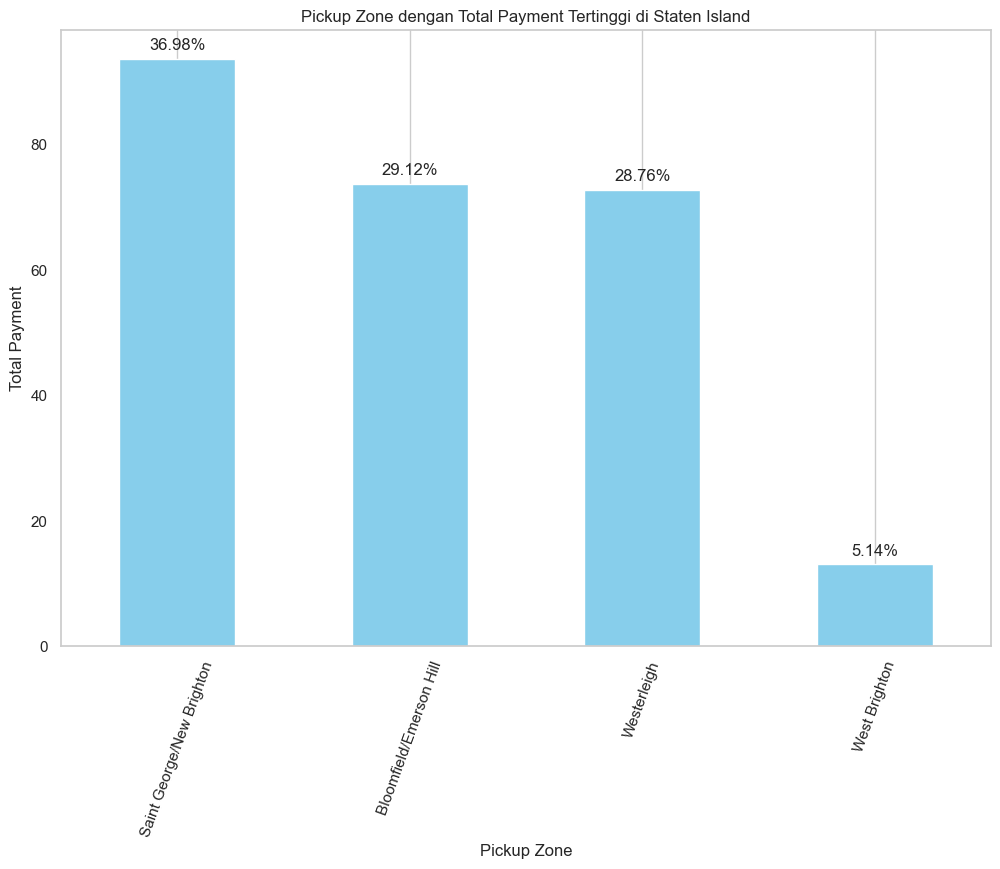

In [43]:
# Filter data berdasarkan PU_borough = 'Staten Island'
staten_island = df_TLC_NYC[df_TLC_NYC['PU_borough'] == 'Staten Island']

# Mengelompokkan data berdasarkan PU_zone dan menghitung total_amount kemudian memilih 10 PU_zone dengan total_amount tertinggi
top_payment_staten_island = staten_island.groupby('PU_zone')['total_amount'].sum().nlargest(10)

# Plotting bar plot untuk top PU_zone di Staten Island
plt.figure(figsize=(12, 8))
bars = top_payment_staten_island.plot(kind='bar', color='skyblue')
plt.title('Pickup Zone dengan Total Payment Tertinggi di Staten Island')
plt.xlabel('Pickup Zone')
plt.ylabel('Total Payment')
plt.xticks(rotation=70)
plt.grid(axis='y')

# Menambahkan nilai persentase pada setiap bar
total = top_payment_staten_island.sum()
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height/total:.2%}', ha='center', va='bottom')

plt.show()

- Dari heatmap di atas dapat dilihat bahwa wilayah yang memiliki pendapatan taksi terbesar berada di wilayah Manhattan terutama pada weekdays (Senin - Jumat) sedangkan pada weekend (Sabtu - Minggu) dari heatmap terlihat bahwa Brooklyn juga memiliki prospek yang besar untuk meraup keuntungan dikarenakan di Brooklyn terlihat pada hari Weekend pendapatannya justru besar jika dibandingkan saat weekdays. 
- Di mana apabila wilayah tersebut lebih dispesifikasikan ke dalam sebuah zona maka dapat terlihat di setiap wilayah memiliki zona potensial untuk mendapatkan profit yang besar seperti :

1. **Manhattan**     : East Harlem North dan East Harlem South

2. **Queens**        : Forest Hills dan Elmhurst

3. **Brooklyn**      : Fort Greene dan Downtown Brooklyn/Metrotech

4. **Bronx**         : East Concourse/Concourse Village, West Concourse, Mott Haven/Port Morris dan Melrose South

5. **Staten Island** : Saint George/New Brighton dan Bloomfield/Emerson Hill

In [44]:

# Distribusi perjalanan berdasarkan jam & hari (Peak vs Off-peak)

trip_by_hour = df_TLC_NYC["pickup_hour"].value_counts().sort_index().reset_index()
trip_by_hour.columns = ["Hour", "Total Trips"]

trip_by_day = df_TLC_NYC["pickup_day"].value_counts().reset_index()
trip_by_day.columns = ["Day", "Total Trips"]

# Menambah kolom jam sibuk/rush hour (Rush Hour: 7-9 AM & 4-7 PM)
df_TLC_NYC["rush_hour"] = df_TLC_NYC["pickup_hour"].apply(lambda x: "Peak" if (7 <= x <= 9 or 16 <= x <= 19) else "Off-Peak")
trip_rush_vs_off = df_TLC_NYC["rush_hour"].value_counts().reset_index()
trip_rush_vs_off.columns = ["Time Period", "Total Trips"]

# 5Identifikasi rute paling populer (pickup → dropoff)
top_routes = df_TLC_NYC.groupby(["PU_zone", "DO_zone"]).size().reset_index(name="Total Trips")
top_routes = top_routes.sort_values(by="Total Trips", ascending=False).head(10)

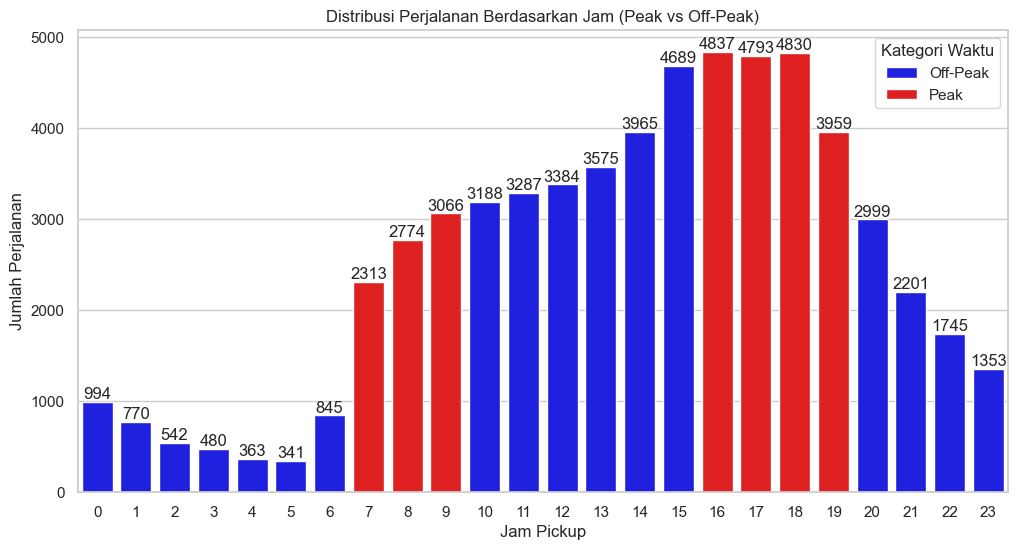

In [45]:
# Distribusi perjalanan berdasarkan jam & hari (Peak vs Off-peak)
plt.figure(figsize=(12, 6))
sns.countplot(x="pickup_hour", hue="rush_hour", data=df_TLC_NYC, palette={"Peak": "red", "Off-Peak": "blue"})
plt.title("Distribusi Perjalanan Berdasarkan Jam (Peak vs Off-Peak)")
for i in range(24):
    plt.text(i, trip_by_hour["Total Trips"].iloc[i], trip_by_hour["Total Trips"].iloc[i], ha="center", va="bottom")
plt.xlabel("Jam Pickup")
plt.ylabel("Jumlah Perjalanan")
plt.legend(title="Kategori Waktu")
plt.show()

Grafik di atas menunjukkan jumlah perjalanan berdasarkan jam pickup, dengan kategori Peak (jam sibuk: 07:00-09:00 & 16:00-19:00) dan Off-Peak. Terlihat bahwa jumlah perjalanan meningkat pada jam sibuk, terutama pada sore hari.

sekarang kita kategorikan berdasarkan dari jam pickup 5 borough dengan pendapatan tertinggi

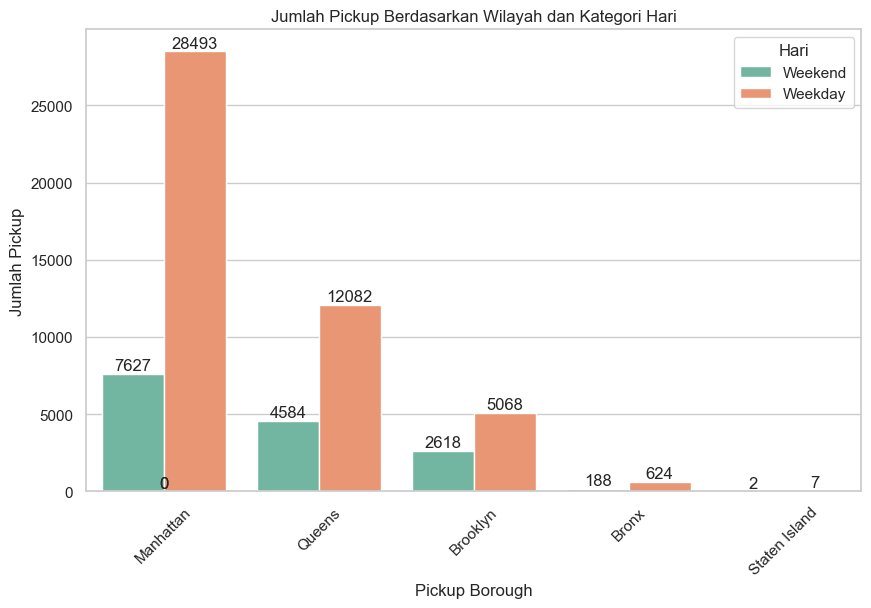

In [46]:
# Membuat count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df_TLC_NYC, x='PU_borough', hue='day_type', palette='Set2')

# Anotasi jumlah di setiap bar
for p in plt.gca().patches:
    height = int(round(p.get_height()))
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), 
                       ha='center', va='center', xytext=(0, 6), textcoords='offset points')

plt.title('Jumlah Pickup Berdasarkan Wilayah dan Kategori Hari')
plt.xlabel('Pickup Borough')
plt.ylabel('Jumlah Pickup')
plt.xticks(rotation=45)
plt.legend(title='Hari')
plt.show()

Wilayah dengan jumlah pickup terbesar berada di Manhattan dan dari grafik di atas dapat dilihat bahwa high demandnya setiap wilayah terjadi pada weekdays terutama di Manhattan memiliki selisih yang jauh dikarenakan wilayah Manhattan merupakan pusat bisnis sehingga banyak pemesanannya yang terjadi pada hari kerja (Weekdays).

In [47]:
payment = df_TLC_NYC.groupby('payment_type').size().reset_index(name='payment_count')
replacement_list = ['Credit Card','Cash','No Charge','Dispute','Unknown','Voided Trip']
replacement_dict = {1:replacement_list[0],2:replacement_list[1],3:replacement_list[2],4:replacement_list[3],5:replacement_list[4],6:replacement_list[5]}
payment['payment_type'].replace(replacement_dict, inplace=True)
payment['percent'] = (round(payment['payment_count']/sum(payment['payment_count'])*100,2))

payment

C:\Users\Ikhsan Herdi F\AppData\Local\Temp\ipykernel_18048\3693346627.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  payment['payment_type'].replace(replacement_dict, inplace=True)


,payment_type,payment_count,percent
0,Credit Card,38969,63.58
1,Cash,21791,35.55
2,No Charge,439,0.72
3,Dispute,92,0.15
4,Unknown,2,0.00


PAYMENT TYPE ANALYSIS

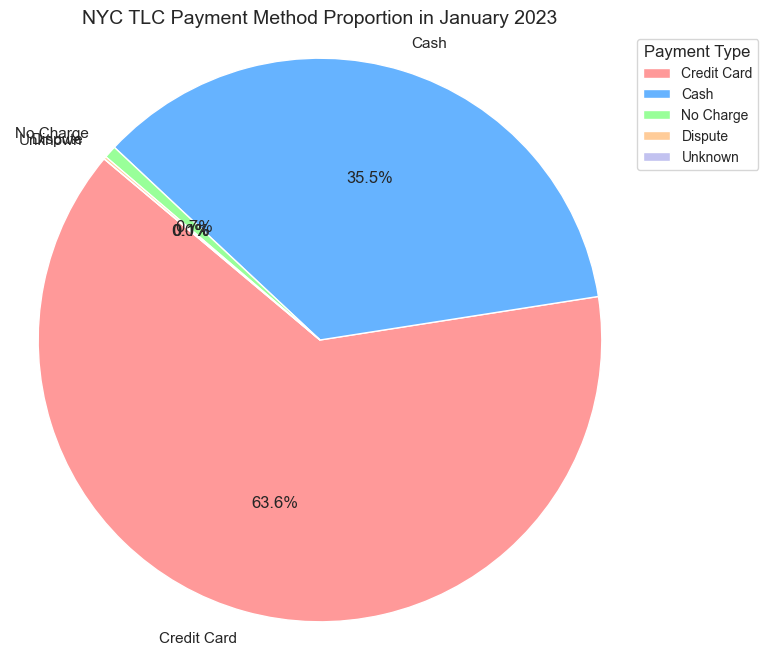

In [60]:
# Pie chart
labels = payment['payment_type']
sizes = payment['percent']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6']
explode = (0.1, 0, 0, 0, 0, 0)  # explode the first slice (Credit Card)
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('NYC TLC Payment Method Proportion in January 2023', fontsize=14)
plt.legend(title='Payment Type', loc='upper left', bbox_to_anchor=(1, 0, 0.5, 1), fontsize=10)
plt.axis('equal')  # Biar bentuk pie-nya bulat sempurna
plt.show()

- Penjelasan Data
    - metode pembayaran terbanyak menggunakan credit card dengan 63% dan cash dengan 36%
    - untuk no charge(gratis) atau dispute proporsi sangat kecil sehingga tidak perlu di perhitungkan 
- Rekomendasi
    - Setiap taxi dipasangkan fasilitas pembayaran untuk credit card karena mayoritas penumpang membayar menggunakan credit card
    - Dapat melakukan kerjasama dengan perusahaan penyedia credit card supaya dapat mendorong pelanggan menggunakan credit card dengan benefit yang menguntungkan pelanggan, contoh bentuk kerjasama nya yaitu (https://www.bluebirdgroup.com/promo/diskon-rp-10-ribu-di-mybluebird-pakai-kartu-kredit-bca?lang=id) 

C:\Users\Ikhsan Herdi F\AppData\Local\Temp\ipykernel_18048\4049220014.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count_tip_borough.index, y=count_tip_borough.values, palette="viridis")


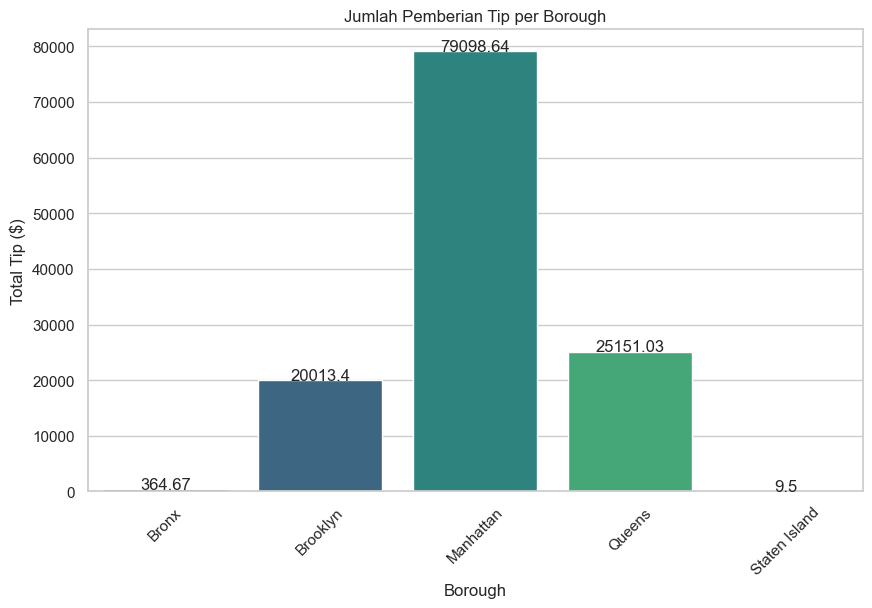

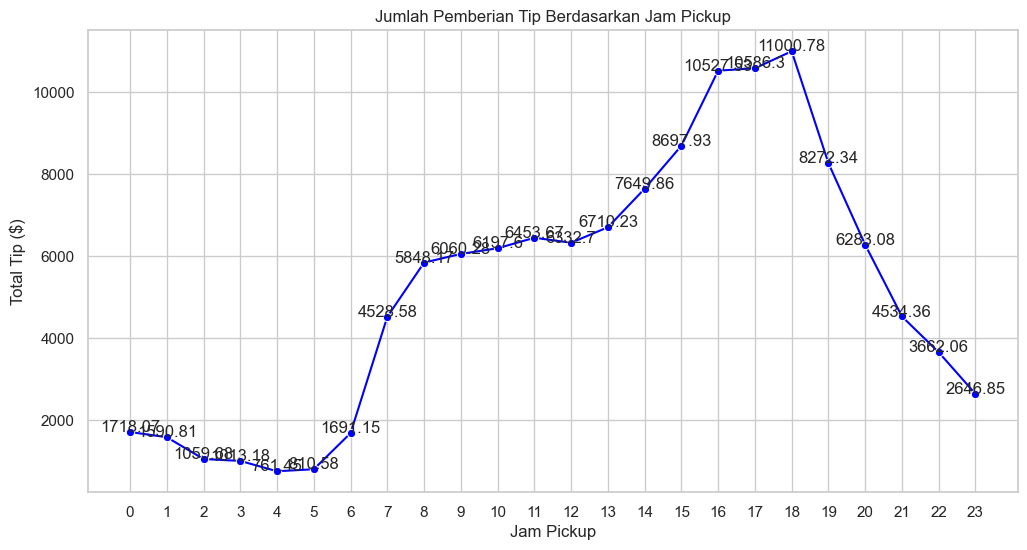

In [49]:
# Pola pemberian tip berdasarkan zona & waktu

# Menghitung count tip berdasarkan borough
count_tip_borough = df_TLC_NYC.groupby("PU_borough")["tip_amount"].sum()

# Visualisasi rata-rata tip per borough
plt.figure(figsize=(10, 6))
sns.barplot(x=count_tip_borough.index, y=count_tip_borough.values, palette="viridis")
for i in range(len(count_tip_borough)):
    plt.text(i, count_tip_borough.values[i], round(count_tip_borough.values[i], 2), ha="center")
plt.title("Jumlah Pemberian Tip per Borough")
plt.xlabel("Borough")
plt.ylabel("Total Tip ($)")
plt.xticks(rotation=45)
plt.show()

# Menghitung jumlah tip berdasarkan jam pickup di manhattan
count_tip_hour = df_TLC_NYC.groupby("pickup_hour")["tip_amount"].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(x=count_tip_hour.index, y=count_tip_hour.values, marker="o", color="blue")
for i in range(24):
    plt.text(i, count_tip_hour.values[i], round(count_tip_hour.values[i], 2), ha="center")
plt.title("Jumlah Pemberian Tip Berdasarkan Jam Pickup")
plt.xlabel("Jam Pickup")
plt.ylabel("Total Tip ($)")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


C:\Users\Ikhsan Herdi F\AppData\Local\Temp\ipykernel_18048\1501836807.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tip_per_zone, x='tip_amount', y='PU_zone', palette='Greens_r')


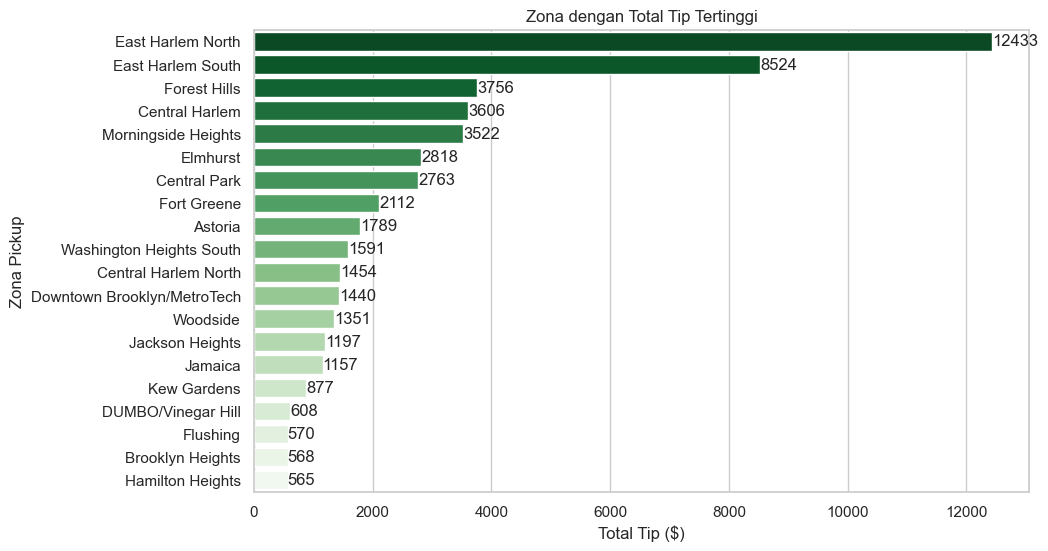

In [50]:
# Hitung ulang rata-rata tip per zona pickup
tip_per_zone = df_TLC_NYC.groupby('PU_zone')['tip_amount'].count().reset_index()

# Urutkan berdasarkan rata-rata tip tertinggi
tip_per_zone = tip_per_zone.sort_values(by='tip_amount', ascending=False).head(20)

# Visualisasi heatmap zona dengan tip tertinggi
plt.figure(figsize=(10, 6))
sns.barplot(data=tip_per_zone, x='tip_amount', y='PU_zone', palette='Greens_r')
for i in range(len(tip_per_zone)):
    plt.text(tip_per_zone['tip_amount'].iloc[i], i, round(tip_per_zone['tip_amount'].iloc[i], 2), ha="left", va="center")
plt.title('Zona dengan Total Tip Tertinggi')
plt.xlabel('Total Tip ($)')
plt.ylabel('Zona Pickup')
plt.show()

Beberapa zona memiliki rata-rata tip yang lebih tinggi dari $3.
Zona dengan tip tertinggi bisa menjadi indikator area premium atau tempat dengan lebih banyak pelanggan yang memberi tip besar.
Data ini bisa digunakan oleh pengemudi untuk menargetkan lokasi dengan peluang tip lebih besar.

In [51]:
df_TLC_NYC['day_type'].value_counts()

day_type
Weekday    46274
Weekend    15019
Name: count, dtype: int64

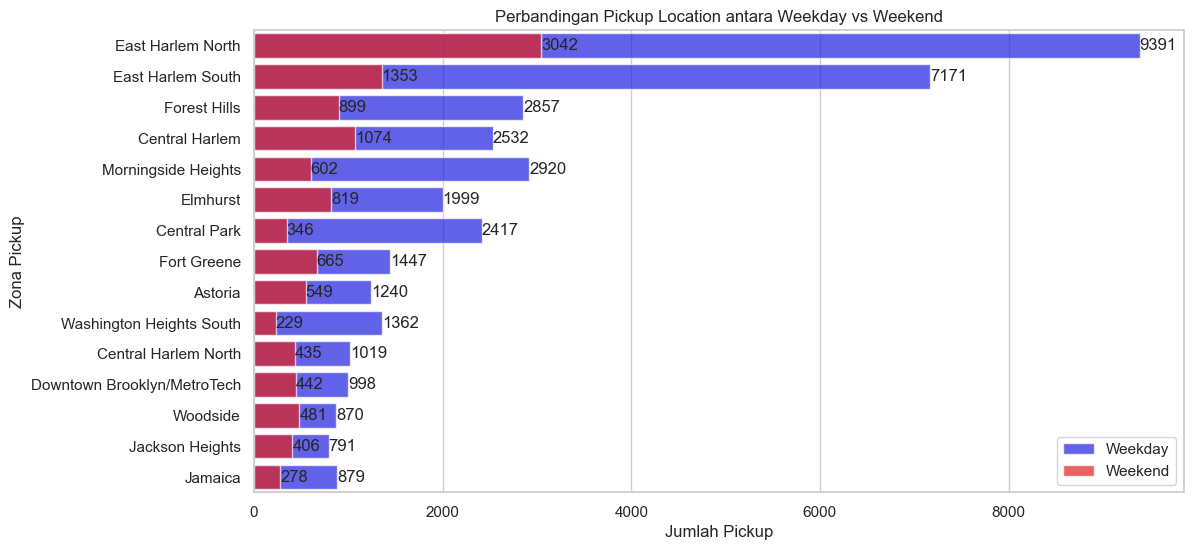

In [52]:
# Hitung jumlah pickup berdasarkan zona dan tipe hari
pickup_weekday = df_TLC_NYC[df_TLC_NYC['day_type'] == 'Weekday']['PU_zone'].value_counts().reset_index()
pickup_weekend = df_TLC_NYC[df_TLC_NYC['day_type'] == 'Weekend']['PU_zone'].value_counts().reset_index()

# Ganti nama kolom agar lebih jelas
pickup_weekday.columns = ['PU_zone', 'pickup_count_weekday']
pickup_weekend.columns = ['PU_zone', 'pickup_count_weekend']

# Gabungkan data untuk perbandingan berdasarkan 'PU_zone'
pickup_comparison = pickup_weekday.merge(pickup_weekend, on='PU_zone', how='inner')

# Urutkan berdasarkan total pickup tertinggi
pickup_comparison['total_pickup'] = pickup_comparison['pickup_count_weekday'] + pickup_comparison['pickup_count_weekend']
pickup_comparison = pickup_comparison.sort_values(by='total_pickup', ascending=False).head(15)

# Visualisasi perbandingan
plt.figure(figsize=(12, 6))
sns.barplot(data=pickup_comparison, y='PU_zone', x='pickup_count_weekday', color='blue', label='Weekday', alpha=0.7)
for i in range(len(pickup_comparison)):
    plt.text(pickup_comparison['pickup_count_weekday'].iloc[i], i, round(pickup_comparison['pickup_count_weekday'].iloc[i], 2), ha="left", va="center")
sns.barplot(data=pickup_comparison, y='PU_zone', x='pickup_count_weekend', color='red', label='Weekend', alpha=0.7)
for i in range(len(pickup_comparison)):
    plt.text(pickup_comparison['pickup_count_weekend'].iloc[i], i, round(pickup_comparison['pickup_count_weekend'].iloc[i], 2), ha="left", va="center")
plt.xlabel('Jumlah Pickup')
plt.ylabel('Zona Pickup')
plt.title('Perbandingan Pickup Location antara Weekday vs Weekend')
plt.legend()
plt.show()

Pada grafik di atas dapat dilihat bahwa permintaan terhadap layanan taksi New York high demand pada saat weekday terlihat lebih signifikan terlebih di wilayah East Harlem North dan South

In [53]:
df_TLC_NYC['trip_category'].value_counts()

trip_category
Pendek      33816
Menengah    20537
Panjang      6940
Name: count, dtype: int64

C:\Users\Ikhsan Herdi F\AppData\Local\Temp\ipykernel_18048\282840171.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_TLC_NYC['trip_category'].value_counts().index, y=df_TLC_NYC['trip_category'].value_counts().values, palette='Blues_r')


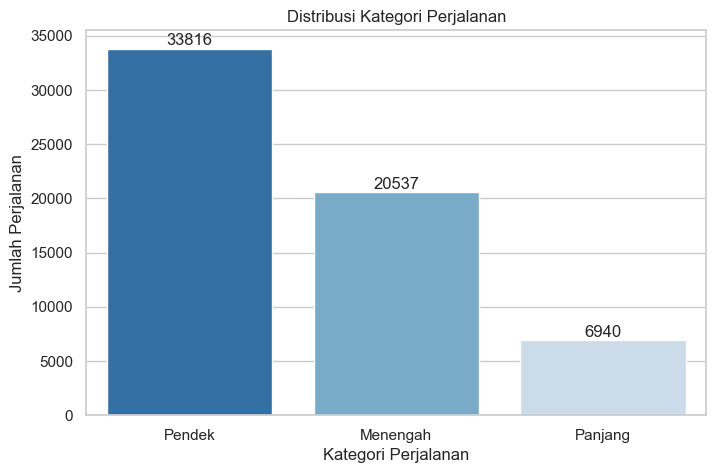

In [54]:
# Visualisasi distribusi kategori perjalanan
plt.figure(figsize=(8, 5))
sns.barplot(x=df_TLC_NYC['trip_category'].value_counts().index, y=df_TLC_NYC['trip_category'].value_counts().values, palette='Blues_r')
plt.title('Distribusi Kategori Perjalanan')
plt.xlabel('Kategori Perjalanan')
for i, v in enumerate(df_TLC_NYC['trip_category'].value_counts().values):
    plt.text(i, v + 50, str(v), ha='center', va='bottom')
plt.ylabel('Jumlah Perjalanan')
plt.show()


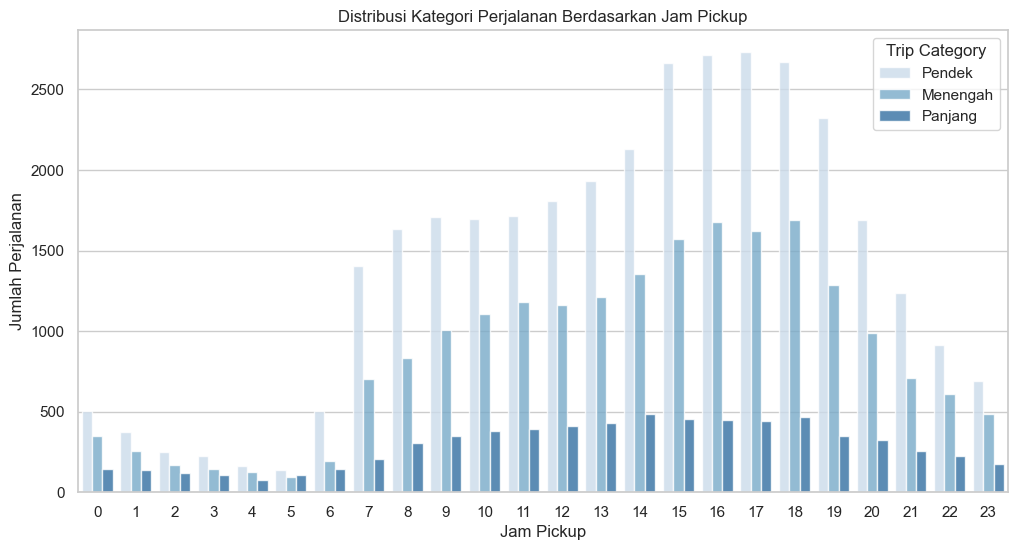

In [55]:
# Visualisasi distribusi kategori perjalanan berdasarkan jam pickup
plt.figure(figsize=(12, 6))
sns.countplot(data=df_TLC_NYC, x=df_TLC_NYC['lpep_pickup_datetime'].dt.hour, hue='trip_category', palette='Blues', alpha=0.8)
plt.title('Distribusi Kategori Perjalanan Berdasarkan Jam Pickup')
plt.xlabel('Jam Pickup')
plt.ylabel('Jumlah Perjalanan')
plt.xticks(range(0, 24))
plt.legend(title='Trip Category')
plt.show()


# Kesimpulan Utama:

1. Wilayah dengan pendapatan terbesar berada di wilayah Manhattan. Dapat dilihat dari heatmap juga bahwa pendapatan yang tinggi di Manhattan itu didapatkan pada hari weekday (Senin-Jumat). Di mana seperti diketahui bahwa Manhattan merupakan pusat kota bisnis sehingga tentunya pada hari weekdays merupakan peluang yang besar untuk pengemudi mencari penumpang di sekitaran Manhattan sehingga mendapatkan pendapatan yang maksimal. Jika dilihat saat weekend (Sabtu-Minggu) terlihat bahwa wilayah Brooklyn selain Manhattan juga memiliki prospek untuk meraup keuntungan di mana terlihat pada heatmapnya keuntungan yang didapatkan besar jika dibandingkan saat weekdays.
Apabila dispesifikan ke dalam suatu zona dari setiap wilayah, berikut ini merupakan zona yang memiliki prospek untuk mendapatkan keuntungan yang besar di wilayah tersebut dilihat berdasarkan pendapatannya selama Januari 2023:

- **Manhattan**     : East Harlem North dan East Harlem South

- **Brooklyn**      : Fort Greene dan Downtown Brooklyn/Metrotech

- **Queens**        : Forest Hills dan Elmhurst

- **Bronx**         : East Concourse/Concourse Village, West Concourse, Mott Haven/Port Morris dan Melrose South

- **Staten Island** : Saint George/New Brighton dan Bloomfield/Emerson Hill


2. Wilayah dengan permintaan pickup terbanyak juga terdapat pada wilayah Manhattan dan setiap wilayah menunjukkan permintaan tinggi terjadi saat weekdays sedangkan di weekend masih tergolong rendah untuk permintaan pickupnya.

3. Metode pembayaran terbanyak menggunakan credit card dengan 63% dan cash dengan 36%, untuk no charge(gratis) atau dispute proporsi sangat kecil sehingga tidak perlu di perhitungkan 

4. Pemberian TIP paling banyak terdapat di Manhattan, dilanjutkan oleh Queens, Brooklyn, Bronx, dan Staten Island. Pada grafik TIP atas dapat dilihat bahwa tip tertinggi berada pada rush-hour yaitu pukul 16.00 - 18.00, dan  Beberapa zona memiliki rata-rata tip yang lebih tinggi dari $3. Zona dengan tip tertinggi bisa menjadi indikator area premium atau tempat dengan lebih banyak pelanggan yang memberi tip besar.
Data ini bisa digunakan oleh pengemudi untuk menargetkan lokasi dengan peluang tip lebih besar.

5. Perbandingan pickup lebih signifikan terlihat pada weekday, data tersebut bisa menjadi patokan untuk pada pengemudi memperbanyak armada pada saat weekday

6. Mayoritas perjalanan tergolong Pendek (Short trips), menunjukkan banyaknya perjalanan dalam jarak dekat. Perjalanan Menengah (Medium trips) juga cukup umum, sementara perjalanan Panjang (Long trips) lebih jarang terjadi. Hal ini bisa mengindikasikan bahwa taksi lebih sering digunakan untuk perjalanan dalam kota dibandingkan perjalanan jauh.

# Rekomendasi:

1. Fokus pada wilayah Manhattan di zona East Harlem North dan East Harlem South selama weekdays. Hal ini dapat dilakukan dengan cara meningkatkan armada taksi di zona tersebut sedangkan saat weekend mencoba untuk membagi distribusi peningkatan armada taksi antara Manhattan dan Brooklyn dikarenakan dilihat dari data menunjukkan bahwa Brooklyn ketika weekend memiliki potensi untuk meningkatkan penghasilan dikarenakan saat bulan Januari 2023, penghasilan di wilayah Brooklyn saat weekend lebih tinggi jika dibandingkan dengan weekdays.

2. Untuk mempertahankan banyaknya permintaan pickup dari penumpang maka dapat dicoba untuk memberikan penawaran khusus bagi penumpang yang sering naik taksi. Hal ini dapat dilakukan dengan cara membuat program loyalty card dengan teknik mengumpulkan poin berdasarkan miles perjalanan taksi yang ditumpangi sehingga nantinya bisa memperoleh potongan harga untuk perjalanan selanjutnya.

3. Setiap taxi dipasangkan fasilitas pembayaran untuk credit card karena mayoritas penumpang membayar menggunakan credit card. Dapat melakukan kerjasama dengan perusahaan penyedia credit card supaya dapat mendorong pelanggan menggunakan credit card dengan benefit yang menguntungkan pelanggan, contoh bentuk kerjasama nya yaitu (https://www.bluebirdgroup.com/promo/diskon-rp-10-ribu-di-mybluebird-pakai-kartu-kredit-bca?lang=id)

4. Fokuskan Operasi di Wilayah Manhattan pada Jam Sibuk karena Manhattan memiliki jumlah dan rata-rata tip tertinggi. Prioritaskan area Manhattan terutama saat rush-hour (16:00–18:00). Edukasi Pengemudi tentang Pengaruh Pelayanan terhadap Tip karena Tip juga dipengaruhi oleh kualitas layanan (ramah, membantu, tepat waktu).

5. Memfokuskan armada pada area manhattan, queens, dan brooklyn untuk weekday

6. Operator taksi bisa meningkatkan tarif dasar untuk perjalanan pendek agar tetap menguntungkan, Menawarkan insentif untuk perjalanan panjang, seperti diskon atau harga tetap untuk rute tertentu.

In [56]:
df_TLC_NYC

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,trip_duration,trip_category,pickup_hour,rush_hour,pickup_day,day_type,PU_zone,PU_borough,DO_zone,DO_borough
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,11.016667,Menengah,0,Off-Peak,Sunday,Weekend,Morningside Heights,Manhattan,Lincoln Square West,Manhattan
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,6.766667,Pendek,0,Off-Peak,Sunday,Weekend,Bloomingdale,Manhattan,Central Park,Manhattan
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,6.333333,Pendek,0,Off-Peak,Sunday,Weekend,Steinway,Queens,Old Astoria,Queens
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,5.816667,Pendek,0,Off-Peak,Sunday,Weekend,Central Harlem,Manhattan,Upper West Side North,Manhattan
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,5.966667,Pendek,0,Off-Peak,Sunday,Weekend,Central Harlem,Manhattan,East Harlem North,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62810,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,...,7.983333,Menengah,23,Off-Peak,Tuesday,Weekday,Jamaica,Queens,Saint Albans,Queens
62811,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,...,10.750000,Menengah,23,Off-Peak,Tuesday,Weekday,Downtown Brooklyn/MetroTech,Brooklyn,Park Slope,Brooklyn
62812,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,...,6.016667,Pendek,23,Off-Peak,Tuesday,Weekday,Washington Heights South,Manhattan,Hamilton Heights,Manhattan
62813,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,...,9.533333,Menengah,23,Off-Peak,Tuesday,Weekday,East Harlem North,Manhattan,Upper West Side North,Manhattan


In [57]:
# export dataframe ke csv
df_TLC_NYC.to_csv('NYC_TLC_Trip_Record_Jan2023.csv', index=False)